# Plot the forcing fields

In [4]:
using Dates
using NCDatasets
using CairoMakie, Makie
using ColorSchemes
using GeoMakie
using GeoDatasets
using Glob

## Files and directories

In [12]:
if gethostname() == "ctroupin-laptop"
    dirname = "My Passport"
elseif gethostname() == "ctroupin-PRIME-A320M-C-R2-0" 
    dirname = "T7Shield"
else
    @error("Unknown host name")
end

datadir = "/media/ctroupin/$(dirname)/CROCO_FILES/run_nea_hermione"
forcingdir = joinpath(datadir, "../ERA5")
figdir = "../figures/"
grdfile1 = joinpath(datadir, "croco_grd_nea.nc")
grdfile2 = joinpath(datadir, "croco_grd_nea.nc.1")
frcfile1 = joinpath(forcingdir, "")
frcfilelist = glob("*Y2013M01.nc", forcingdir)

9-element Vector{String}:
 "/media/ctroupin/My Passport/CRO" ⋯ 18 bytes ⋯ "ermione/../ERA5/LSM_Y2013M01.nc"
 "/media/ctroupin/My Passport/CROCO_FILES/run_nea_hermione/../ERA5/Q_Y2013M01.nc"
 "/media/ctroupin/My Passport/CRO" ⋯ 18 bytes ⋯ "ermione/../ERA5/SSR_Y2013M01.nc"
 "/media/ctroupin/My Passport/CRO" ⋯ 18 bytes ⋯ "ermione/../ERA5/SST_Y2013M01.nc"
 "/media/ctroupin/My Passport/CRO" ⋯ 19 bytes ⋯ "rmione/../ERA5/STRD_Y2013M01.nc"
 "/media/ctroupin/My Passport/CRO" ⋯ 18 bytes ⋯ "ermione/../ERA5/T2M_Y2013M01.nc"
 "/media/ctroupin/My Passport/CROCO_FILES/run_nea_hermione/../ERA5/TP_Y2013M01.nc"
 "/media/ctroupin/My Passport/CRO" ⋯ 19 bytes ⋯ "rmione/../ERA5/U10M_Y2013M01.nc"
 "/media/ctroupin/My Passport/CRO" ⋯ 19 bytes ⋯ "rmione/../ERA5/V10M_Y2013M01.nc"

## Colormap depending on the variable

In [50]:
colorschemedict = Dict([
    "LSM" => Reverse(:grays), 
    "Q" => :tempo, 
    "SSR" => :solar, 
    "SST" => :thermal,
    "STRD" => :solar,
    "T2M" => :thermal,
    "TP" => :rain,
    "U10M" => :speed,
    "V10M" => :speed
])

Dict{String, Any} with 9 entries:
  "Q"    => :tempo
  "SST"  => :thermal
  "TP"   => :rain
  "SSR"  => :solar
  "STRD" => :solar
  "LSM"  => Reverse{Symbol}(:grays)
  "V10M" => :speed
  "T2M"  => :thermal
  "U10M" => :speed

## Loop on forcing files

In [68]:
for frcfile in frcfilelist

    @info("Working on file $(basename(frcfile))") 
    ds = NCDataset(frcfile, "r")
    lon = ds["lon"][:]
    lat = ds["lat"][:]
    varname = last(keys(ds));
    field2plot = ds[varname][:,:,7]
    varunits = ds[varname].attrib["units"]
    varlongname = ds[varname].attrib["long_name"]
    @info(size(field2plot))
    close(ds)
    
    fig = Figure(size=(800, 800))
    ax = GeoAxis(fig[1,1], dest = "+proj=merc", 
        title = titlecase(replace(varlongname, "_" => " ")),
        titlesize = 18,
        xgridcolor = :lightgray, xgridwidth = 0.5, 
        xgridstyle = :dash, ygridcolor = :lightgray, 
        ygridwidth = 0.5, ygridstyle = :dash, 
        )#, )

    xlims!(ax, -28., -6.)
    ylims!(ax, 21., 39.)
    ax.xticks = collect(-50.:5:0.)
    ax.yticks = collect(20.:5.:45.)
    
    hm = heatmap!(ax, lon, lat, field2plot,
        colormap = colorschemedict[varname],
        nan_color = :gray,
        )
    lines!(ax, GeoMakie.coastlines(10), color=:black, linewidth=0.7) 
    
    Colorbar(fig[1, 2], hm, label = varunits, 
    labelrotation = 0, height = @lift($(pixelarea(ax.scene)).widths[2]))
    figname = joinpath(figdir, "forcing_$(varlongname).png")
    save(figname, fig)
end

[ Info: Working on file LSM_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file Q_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file SSR_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file SST_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file STRD_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file T2M_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file TP_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file U10M_Y2013M01.nc
[ Info: (89, 73)
[ Info: Working on file V10M_Y2013M01.nc
[ Info: (89, 73)


### Vector plot for wind

In [118]:
NN = 1 #subsampling

ds = NCDataset(frcfilelist[end-1], "r")
u2plot = ds["U10M"][1:NN:end,1:NN:end,7]
close(ds)

ds = NCDataset(frcfilelist[end], "r")
v2plot = ds["V10M"][1:NN:end,1:NN:end,7]
close(ds)

vnorm = vec(sqrt.(u2plot .^ 2 .+ v2plot .^ 2));

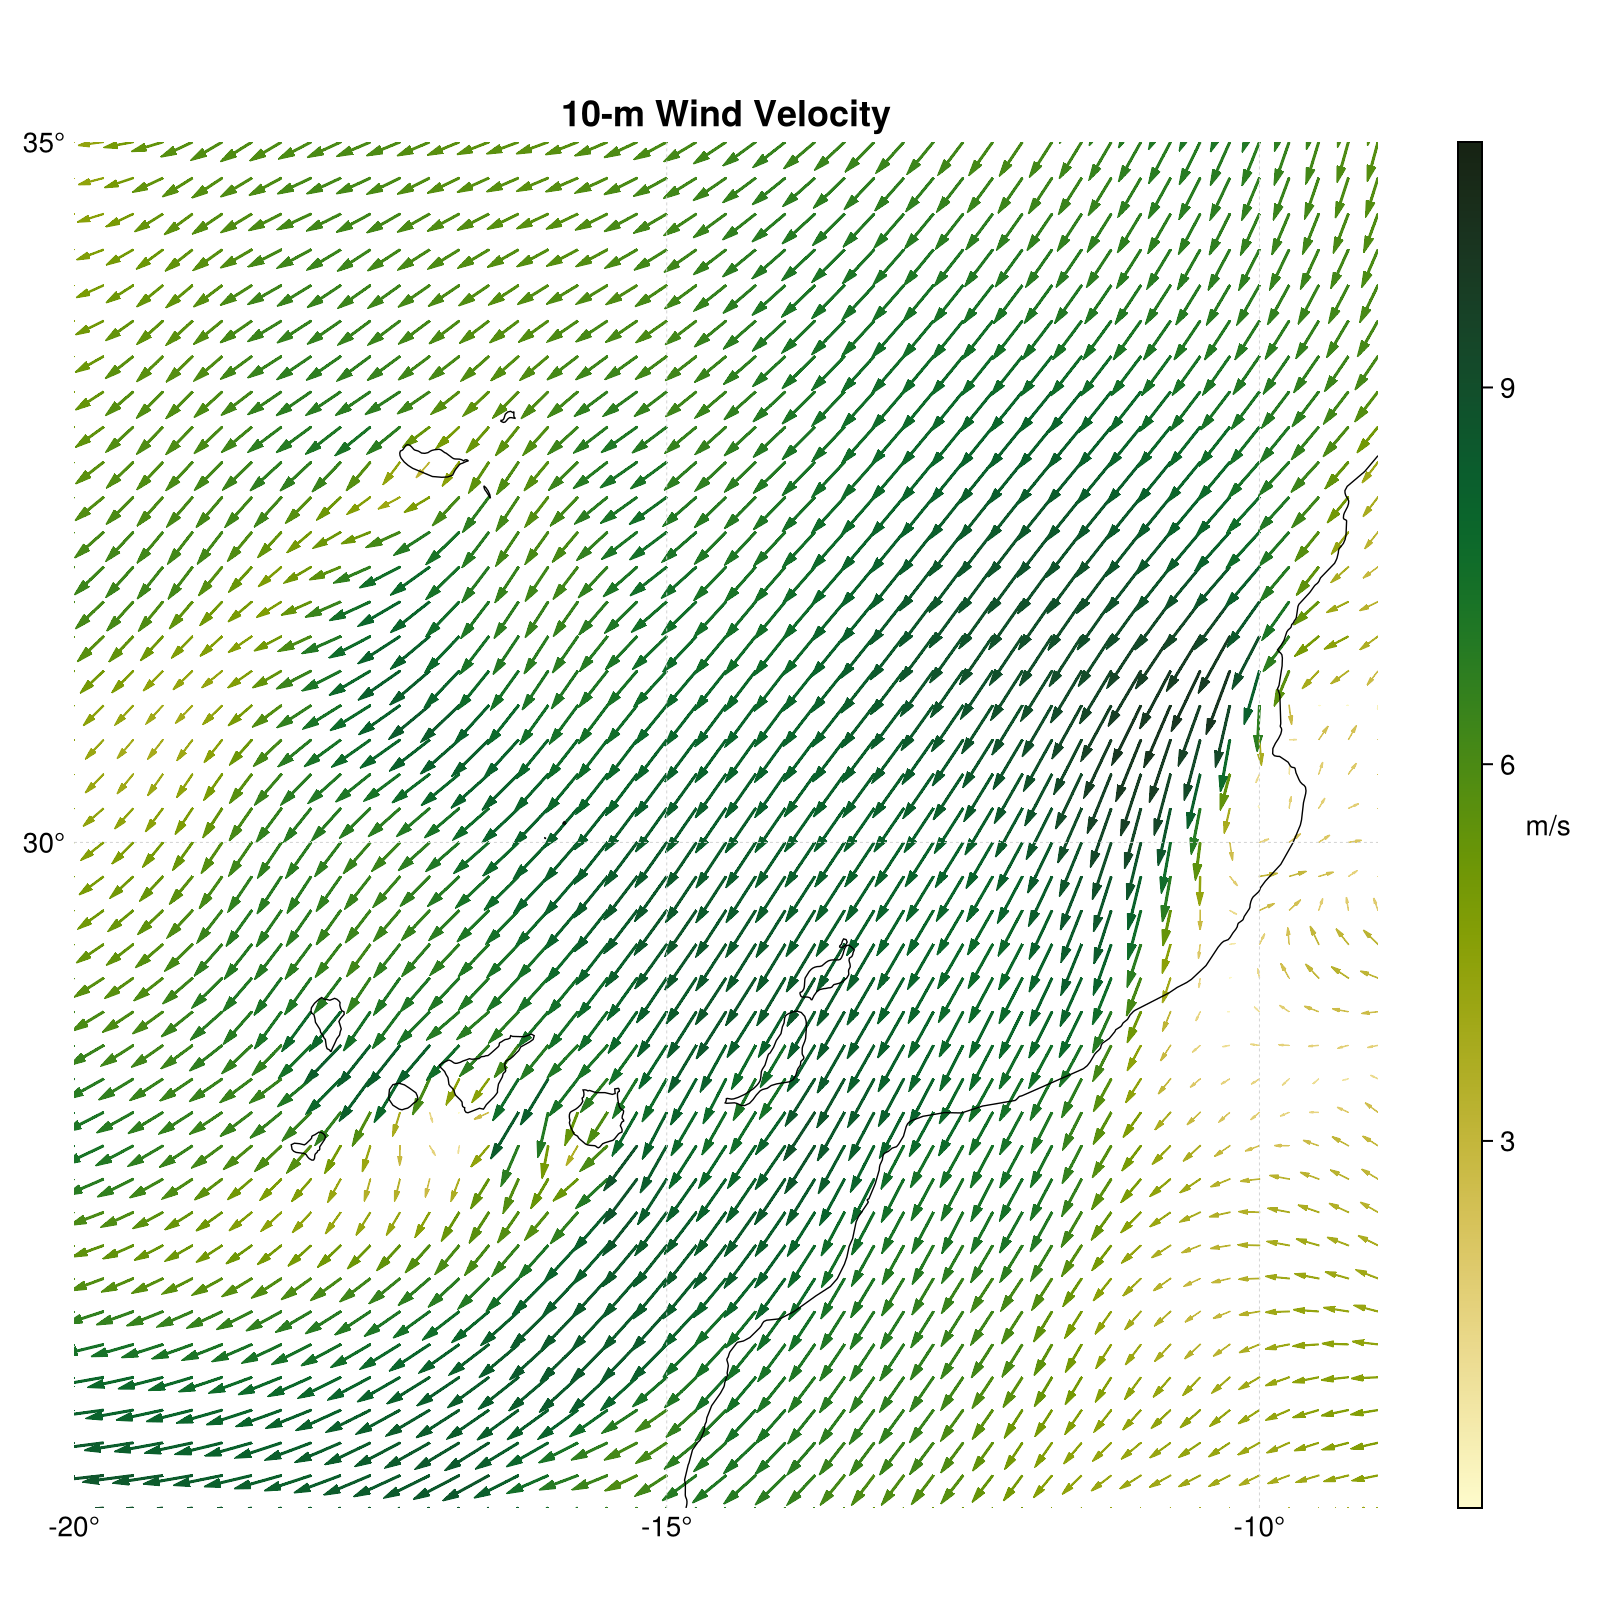

CairoMakie.Screen{IMAGE}


In [121]:
fig = Figure(size=(800, 800))
ax = GeoAxis(fig[1,1], dest = "+proj=merc", 
    title = "10-m Wind Velocity",
    titlesize = 18,
    xgridcolor = :lightgray, xgridwidth = 0.5, 
    xgridstyle = :dash, ygridcolor = :lightgray, 
    ygridwidth = 0.5, ygridstyle = :dash, 
    )#, )

xlims!(ax, -20., -9.)
ylims!(ax, 25., 35.)
ax.xticks = collect(-50.:5:0.)
ax.yticks = collect(20.:5.:45.)

vel = arrows2d!(ax, lon[1:NN:end], lat[1:NN:end], u2plot, v2plot, color=vnorm, lengthscale=0.05, 
tipwidth=5, shaftwidth=1.5, colormap=:speed)

lines!(ax, GeoMakie.coastlines(10), color=:black, linewidth=0.7) 

Colorbar(fig[1, 2], vel, label = "m/s", 
labelrotation = 0, height = @lift($(pixelarea(ax.scene)).widths[2]))
figname = joinpath(figdir, "forcing_windvec.png")
save(figname, fig)
display(fig)